# Indeks dan Pencarian 

In [24]:
import os
import re
import pickle

class TreeNode:
    def __init__(self, term):
        self.term = term
        self.files = set()
        self.left = None
        self.right = None

def insert(root, term, file_path):
    if root is None:
        node = TreeNode(term)
        node.files.add(file_path)
        return node

    if term < root.term:
        root.left = insert(root.left, term, file_path)
    elif term > root.term:
        root.right = insert(root.right, term, file_path)
    else:
        root.files.add(file_path)

    return root

def build_inverted_index(root, folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read().lower()
                terms = re.findall(r'\b\w+\b', content)
                for term in terms:
                    root = insert(root, term, file_path)

    return root

def save_inverted_index(root, output_file):
    with open(output_file, 'wb') as file:
        pickle.dump(root, file)

def build_and_save_combined_index(txts_folder, output_file):
    root = None
    for category in os.listdir(txts_folder):
        category_folder = os.path.join(txts_folder, category, 'all')
        if os.path.isdir(category_folder):
            root = build_inverted_index(root, category_folder)

    save_inverted_index(root, output_file)
    return root

def search_term(root, term):
    node = root
    while node:
        if term < node.term:
            node = node.left
        elif term > node.term:
            node = node.right
        else:
            return node.files
    return set()

# txt folder dan pkl output:
txts_folder = 'txts'
output_file = 'inverted_index.pkl'

# Membangun dan menyimpan inverted index untuk semua kategori
root = build_and_save_combined_index(txts_folder, output_file)



# Search

In [25]:
# Loaded pickle data
import pickle
import os

class TreeNode:
    def __init__(self, term):
        self.term = term
        self.files = set()
        self.left = None
        self.right = None

def search_term(root, term):
    node = root
    while node:
        if term < node.term:
            node = node.left
        elif term > node.term:
            node = node.right
        else:
            return node.files
    return set()

def display_results(root, term):
    print(f'keyword: "{term}"')
    file_paths = search_term(root, term)

    category_counts = {}
    if not file_paths:
        print(f'Term "{term}" not found.')
        return 0
    else:
        print(f'Keyword {term} terdapat pada dokumen:')
        for file_path in file_paths:
            category = os.path.basename(os.path.dirname(os.path.dirname(file_path)))
            if category in category_counts:
                category_counts[category] += 1
            else:
                category_counts[category] = 1
            with open(file_path, 'r', encoding='utf-8') as file:
                title = file.readline().strip()

            # Membagi path menjadi bagian-bagian menggunakan '/'
            path_parts = file_path.split('/')
            print(f"{path_parts[-1]} : {title}")
    
    most_common_category = max(category_counts, key=category_counts.get) # type: ignore
    result_dict = {most_common_category: category_counts[most_common_category]}
    print(f"keyword '{term}' paling banyak ditemukan sebanyak {category_counts[most_common_category]} di kategori '{most_common_category}'")


def load_inverted_index(file_path):
    with open(file_path, 'rb') as file:
        inverted_index = pickle.load(file)
    return inverted_index

# Contoh penggunaan:
input_file = 'inverted_index.pkl'  # Ganti dengan nama file yang sesuai
loaded_index = load_inverted_index(input_file)


In [26]:
# Search term
searched_term = ['puasa', 'makan', 'jokowi', 'warna', 'bola', 'ini']

for i in searched_term:
    display_results(loaded_index, i)
    print('=========\n')
    

keyword: "puasa"
Keyword puasa terdapat pada dokumen:
58.txt : Khutbah Jumat: Sempurnakan Puasa Ramadhan dengan Puasa Syawal
121.txt : Makna 'Minal Aidin wal Faizin' Ternyata Kurang Tepat Diucapkan saat Lebaran
16.txt : Wajibkah Bayar Zakat Fitrah Jika Seseorang Meninggal Dunia di Bulan Ramadhan?
4.txt : Bayar Utang Puasa Ramadhan atau Puasa Syawal, Mana yang Lebih Dulu?
199.txt : Waktu, Niat dan Keutamaan Puasa Syawal 2023
12.txt : Dahsyat, Anthony Ginting Akhiri Puasa Gelar 16 Tahun Tunggal Putra di BAC
192.txt : Khutbah Jumat: Sempurnakan Puasa Ramadhan dengan Puasa Syawal
100.txt : Wajibkah Bayar Zakat Fitrah Jika Seseorang Meninggal Dunia di Bulan Ramadhan?
113.txt : Khutbah Jumat: Sempurnakan Puasa Ramadhan dengan Puasa Syawal
143.txt : Ingin Mulai Ganti Puasa? Simak Hari-hari Umat Islam Dilarang Puasa
250.txt : Khutbah Jumat: Sempurnakan Puasa Ramadhan dengan Puasa Syawal
222.txt : Khutbah Jumat: Sempurnakan Puasa Ramadhan dengan Puasa Syawal
59.txt : Ganas, Ginting Pecundangi S

2023: 1813 times
indonesia: 1413 times
mei: 1140 times
hasil: 937 times
milik: 887 times
jalan: 819 times
salah: 781 times
harap: 689 times
orang: 671 times
terima: 612 times
dunia: 611 times
raih: 611 times
tim: 591 times
tingkat: 574 times
langsung: 560 times
olahraga: 551 times
ajar: 550 times
terang: 547 times
wakil: 547 times
games: 540 times


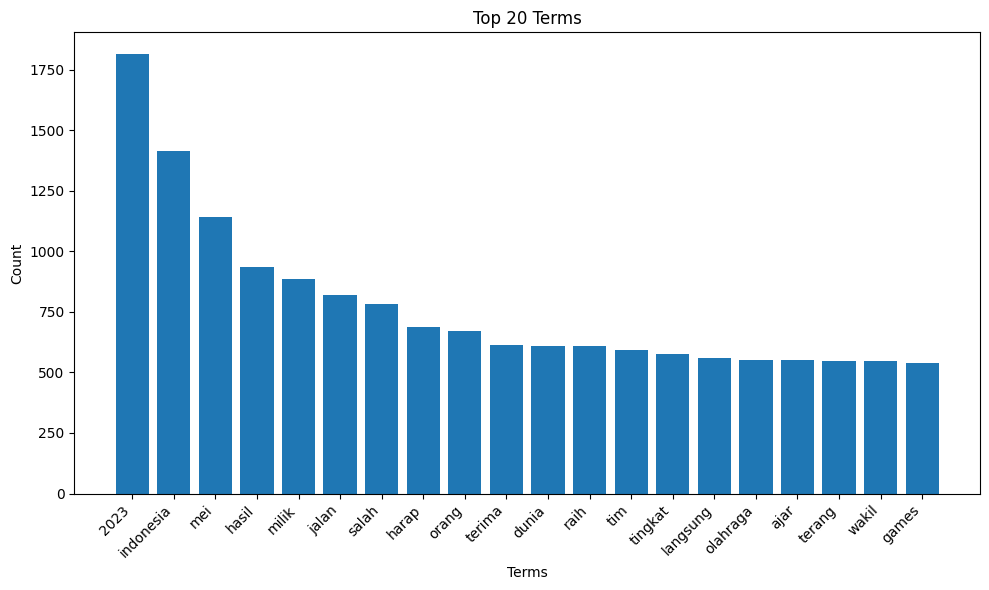

In [29]:
import matplotlib.pyplot as plt

# Your modified inorder_traversal function
def inorder_traversal(node, terms_dict):
    if node:
        inorder_traversal(node.left, terms_dict)

        # Use the length of the files set as the count
        count = len(node.files)

        if node.term in terms_dict:
            terms_dict[node.term] += count
        else:
            terms_dict[node.term] = count

        inorder_traversal(node.right, terms_dict)

# Your modified get_top_terms function without using Counter
def get_top_terms(root, k, exclude_words=None):
    terms_dict = {}
    inorder_traversal(root, terms_dict)

    # Mengambil k term teratas dari dictionary
    top_terms = sorted(terms_dict.items(), key=lambda x: x[1], reverse=True)

    # Filter out excluded words, if specified
    if exclude_words:
        top_terms = [(term, count) for term, count in top_terms if term not in exclude_words]

    # Take the top k terms
    top_terms = top_terms[:k]

    return top_terms


# Contoh penggunaan:
input_file = 'inverted_index.pkl'  # Ganti dengan nama file yang sesuai
loaded_index = load_inverted_index(input_file)

# Example usage:
exclude_words = ["di"]
top_20_terms = get_top_terms(loaded_index, 20, exclude_words)

# for term, count in top_20_terms:
#     print(f"{term}: {count} times")

# Example usage:
top_20_terms = get_top_terms(loaded_index, 20, exclude_words)

# Extract terms and counts for plotting
terms, counts = zip(*top_20_terms)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(terms)), counts, tick_label=terms)
plt.xlabel('Terms')
plt.ylabel('Count')
plt.title('Top 20 Terms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


